# Spam Detection

This notebook implements a simple spam detection system on the SMS Spam Collection Dataset ([more info here](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)) using Naive Bayes as a classifier. The high level idea is that text messages are stored as strings, based on that we can turn each message into a vector using [a Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and then fit a Naive Bayes classifier to decide if the message is spam.

Notebook Workflow:


1.   Get dataset from Kaggle.
2.   List item



In [1]:
# Get dataset from Kaggle

!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')
# Kaggle username and token required

Skipping, found downloaded files in "./sms-spam-collection-dataset" (use force=True to force download)


In [2]:
# Load data
data = pd.read_csv('/content/sms-spam-collection-dataset/spam.csv', encoding = 'ISO-8859-1') # encoding needed otherwise an error is thrown
data.head() # we have unnecessary columns

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)
data.columns = ['labels','data'] # rename
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

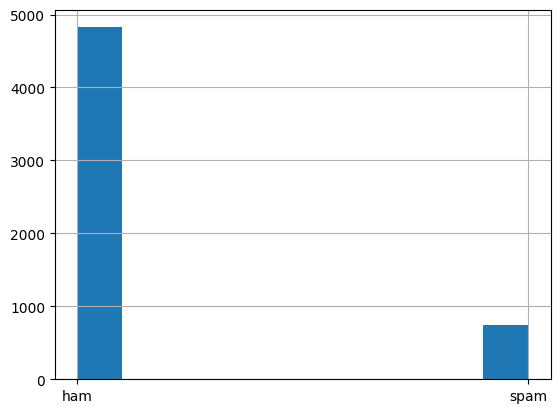

In [4]:
# Check label distribution
data['labels'].hist() # unbalanced

In [5]:
# Create binary labels -> ham:0 & spam:1
data['bin_labels'] = data['labels'].map({'ham':0, 'spam':1})
data.shape

(5572, 3)

In [6]:
# Extract the binary labels to be used for training/testing
y = data['bin_labels'].to_numpy()
type(y) # numpy array

numpy.ndarray

In [10]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['data'], y, test_size = 0.2)

In [11]:
X_train.shape, y_train.shape

((4457,), (4457,))

In [14]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer object
featurizer = CountVectorizer(decode_error = 'ignore')
# Get vector representations
X_train = featurizer.fit_transform(X_train)
X_test = featurizer.transform(X_test)

X_train.shape, X_test.shape

((4457, 7757), (1115, 7757))

In [16]:
# Create model, train, get scores (classic scikitlearn workflow)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)
print(f'The accuracy on the training set is {model.score(X_train,y_train)}')
print(f'The accuracy on the test set is {model.score(X_test,y_test)}')

The accuracy on the training set is 0.9939421135292797
The accuracy on the test set is 0.9829596412556054


In [27]:
# Visualize the data
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def visualize(label):
  """Visualize the most common words per label for each message as a wordcloud"""
  words = ''
  for msg in data[data['labels']==label]['data'][0:4]: # the first 4 messages
    msg = msg.lower()
    words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

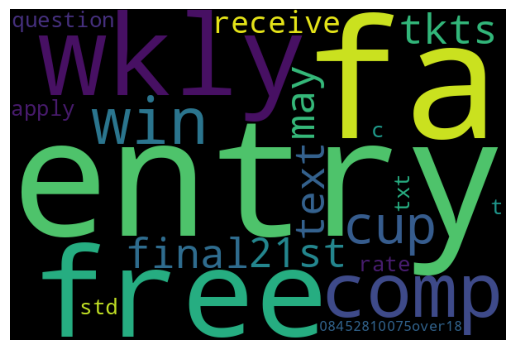

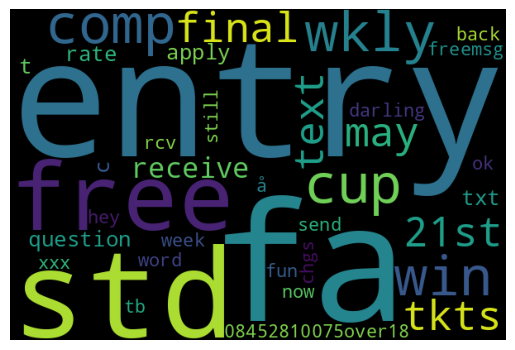

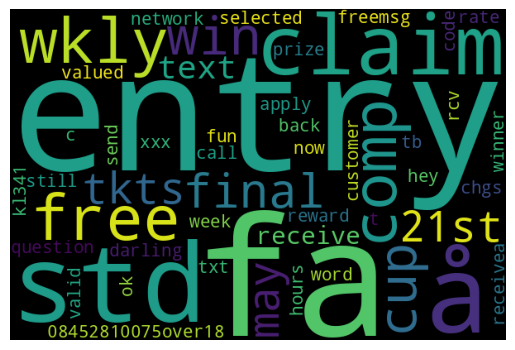

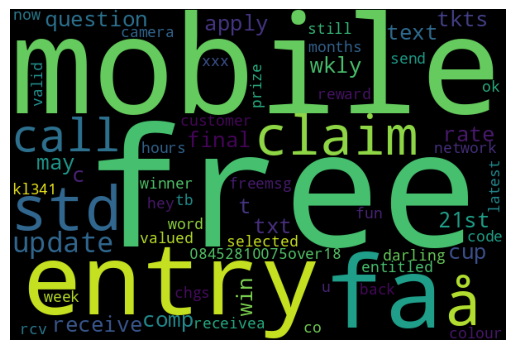

In [26]:
visualize('spam')